In [1]:
import numpy as np
from pandas import Series, DataFrame

In [2]:
import pandas as pd

In [3]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])

In [4]:
arr

array([[ 1.,  2., nan],
       [nan,  3.,  4.]])

In [5]:
dframe1 = DataFrame(arr, index=list('AB'), columns=['One','Two','Three'])

In [6]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [7]:
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [8]:
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [9]:
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [10]:
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [11]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [12]:
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [13]:
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [14]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdweb

In [15]:
import datetime

In [16]:
prices = pdweb.DataReader(['CVX','XOM','BP'],
                          'robinhood',
                          '2015-01-01',
                          '2018-01-01')

In [17]:
#dframeCVX = DataFrame(prices['close_price'].loc['CVX'])
#dframeXOM = DataFrame(prices['close_price'].loc['XOM'])
#dframeBP = DataFrame(prices['close_price'].loc['BP'])

In [18]:
prices_Adj_close = prices['close_price'].unstack().T

In [19]:
prices_Adj_close.head()

symbol,BP,CVX,XOM
begins_at,,,
2017-08-21,32.136800,101.892100,73.404700
2017-08-22,32.278600,102.450800,73.750700
2017-08-23,32.363700,102.691600,73.625800
2017-08-24,32.307000,103.491100,73.356700
2017-08-25,32.647200,104.252100,73.731500


In [20]:
prices_Adj_close['BP'] = prices_Adj_close['BP'].astype('float')
prices_Adj_close['CVX'] = prices_Adj_close['CVX'].astype('float')
prices_Adj_close['XOM'] = prices_Adj_close['XOM'].astype('float')

In [21]:
rets = prices_Adj_close.pct_change()

In [22]:
rets.head()

symbol,BP,CVX,XOM
begins_at,,,
2017-08-21,NaN,NaN,NaN
2017-08-22,0.004412,0.005483,0.004714
2017-08-23,0.002636,0.002350,-0.001694
2017-08-24,-0.001752,0.007785,-0.003655
2017-08-25,0.010530,0.007353,0.005109


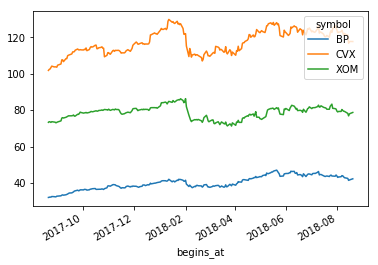

In [23]:
%matplotlib inline
prices_Adj_close.plot()

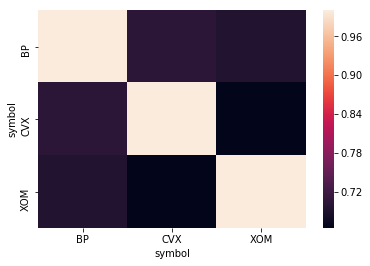

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(rets.corr())

In [25]:
prices_piv = prices.pivot('BP', 'CVX', 'XOM')

KeyError: 'BP'